# Pokemon

This dataset has been released [on Kaggle](https://www.kaggle.com/abcsds/pokemon/version/2#) in the public domain.

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from umap import UMAP

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))
from kprototypes import KPrototypes, CategoricalTransformer

In [2]:
# Load dataset
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# Distinguish between categorical and numerical features
categorical_columns = ['Type 1', 'Type 2', 'Legendary']
numerical_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [4]:
# Normalize numerical features
numerical_transformer = StandardScaler()
numerical_values = numerical_transformer.fit_transform(pokemon_df[numerical_columns].values)

# Encode categorical features
categorical_transformer = CategoricalTransformer()
categorical_values = categorical_transformer.fit_transform(pokemon_df[categorical_columns].values)

In [5]:
# Instanciate model
model = KPrototypes(
    n_clusters=8,
    initialization='frequency',
    numerical_distance='manhattan',
    categorical_distance='matching',
    gamma=None,
    n_iterations=100,
    random_state=None,
    verbose=1,
)

# Fit dataset
clustership = model.fit_predict(numerical_values, categorical_values)

#1: cost=4107.200815233378, moves=231
#2: cost=3983.201956000837, moves=89
#3: cost=3956.428790809213, moves=32
#4: cost=3946.766016075335, moves=23
#5: cost=3919.6015018053886, moves=32
#6: cost=3907.071759171501, moves=24
#7: cost=3894.0871451544363, moves=18
#8: cost=3883.2627549999897, moves=25
#9: cost=3874.3605056186134, moves=16
#10: cost=3871.2228938118988, moves=7
#11: cost=3870.4564574395154, moves=5
#12: cost=3869.1272650958263, moves=4
#13: cost=3868.1315480441062, moves=2
#14: cost=3867.216752674304, moves=3
#15: cost=3865.906263039228, moves=1
#16: cost=3865.82583860084, moves=3
#17: cost=3865.718949242583, moves=2
#18: cost=3865.8313738532734, moves=0


In [6]:
# Number of points per cluster
np.bincount(clustership)

array([167,   2,   1,  85, 269, 108, 101,  67], dtype=int64)

In [7]:
# Project in 2D plane
umap = UMAP(verbose=1)
projection = umap.fit_transform(np.hstack([numerical_values, categorical_values]))

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=1)
Construct fuzzy simplicial set
Mon May  4 11:59:50 2020 Finding Nearest Neighbors
Mon May  4 11:59:50 2020 Finished Nearest Neighbor Search
Mon May  4 11:59:52 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon May  4 11:5

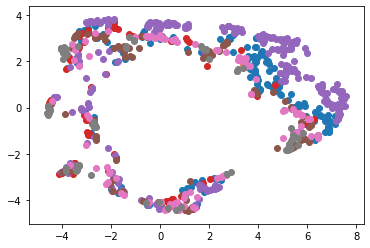

In [8]:
# Show assignment
for k in range(model.n_clusters):
    mask = clustership == k
    plt.scatter(projection[mask, 0], projection[mask, 1])

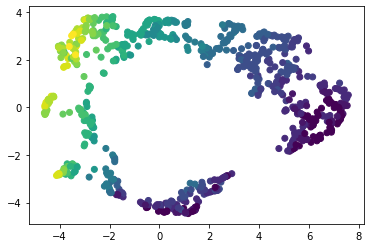

In [9]:
# Show primary type
plt.scatter(projection[:, 0], projection[:, 1], c=categorical_values[:, 0])

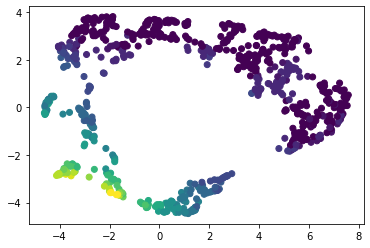

In [10]:
# Show secondary type
plt.scatter(projection[:, 0], projection[:, 1], c=categorical_values[:, 1])

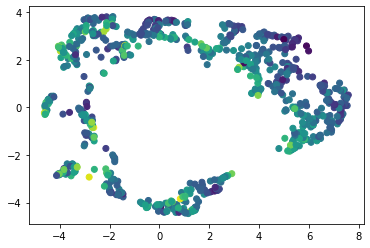

In [11]:
plt.scatter(projection[:, 0], projection[:, 1], c=pokemon_df['Attack'])